In [ ]:
# Cell 2 : Implementation Correctness report. 

# Contents:

# 1. From scratch implementation
# 2. The points with respective numbers
# 3. Dendrogram depicting the linkage order

In [ ]:
# Read me
# Please run the code twice if you are unable to see the graph at the end.

('Predicted values :', array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2]))
('Actual values :', array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2]))
('Silhouette Score: ', -0.029728807189886405)
('NMI Score: ', 1.0)


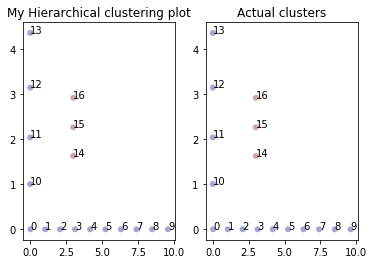

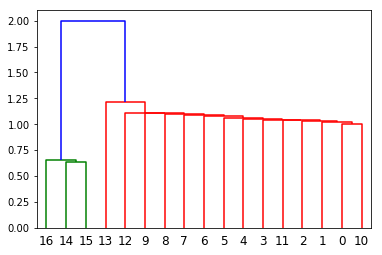

In [3]:
#import statements
import random
import sys
import math
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score, normalized_mutual_info_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from subprocess import check_output
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from sklearn.model_selection import GridSearchCV
from scipy.cluster import hierarchy

#Load dataset from csv file
df = pd.read_csv('Path to your Implementation correctness report')

X = df[['Feature 1', 'Feature 2']].values
y = df['Class/Cluster'].values

# 1. From scratch implementation

#Function to return the Euclidean distance between two points
def euclidean_dist(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

#Function to return the Cosine distance between two points
def cosine_dist(x1, y1, x2, y2):
    x = np.array([x1, y1])
    y = np.array([x2, y2])
    dot_product = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    return 1.0 - (dot_product / (norm_x * norm_y))
    return distance

#Function to return the Manhattan Distance between two points
def manhattan_dist(x1, y1, x2, y2):
    distance = abs(x2 - x1) + abs(y2 - y1)
    return distance

#Returns the distance matrix based on the selected distance funtion for the input numpy array
def distance(X, distance_func):
    ans = []
    if(distance_func == 'euclidean'):
        for i in range(0, len(X)):
            dist_x = []
            for j in range(0, len(X)):
                dist_x.append(euclidean_dist(X[i][0], X[i][1], X[j][0], X[j][1]))
            ans.append(dist_x)
    elif(distance_func == 'manhattan'):
        for i in range(0, len(X)):
            dist_x = []
            for j in range(0, len(X)):
                dist_x.append(manhattan_dist(X[i][0], X[i][1], X[j][0], X[j][1]))
            ans.append(dist_x)
    else:
        for i in range(0, len(X)):
            dist_x = []
            for j in range(0, len(X)):
                dist_x.append(cosine_dist(X[i][0], X[i][1], X[j][0], X[j][1]))
            ans.append(dist_x)
    return ans


linkage_matrix = []
#My agglomerative function takes only 3 inputs as shown below
def fit_agg_scratch(X, n_clusters, distance_func='euclidean'):
    dist_mat = distance(X, distance_func)
    cluster_num = len(X)
    clusters = {}
    #Using a dictionary I'm initially keeping each data point as a cluster. Conerting the input numpy array to list
    for i in range(0,len(X)):
        val = []
        val.append(list(X[i]))
        val[0].append(i)
        clusters[i] = val
    #Running a while loop until number of clusters is greater than the final number of clusters needed.
    while(cluster_num > n_clusters):
        #In each ittreation we need the find the pair of clusters with minimum distance from each other.
        min_dist = sys.maxsize
        c1 = -1
        c2 = -1
        #print(clusters.values())
        for i in clusters.keys():
            for j in clusters.keys():
                if(i != j):
                    #The distance between the two clusters would be the updated value in the matrix
                    dist = dist_mat[clusters.get(i)[0][2]][clusters.get(j)[0][2]]
                    #Keeping track of the clusters with the least distance
                    if (min_dist > dist):
                        min_dist = dist
                        c1 = i
                        c2 = j
        #After finding the two clusters, I am trying to pop on of the cluster's key value pair 
        #and add the value to another cluster making then one.
        val2 = clusters.pop(c2)
        val1 = clusters.get(c1)
        for i in val2:
            val1.append(i)
        clusters.update({c1:val1})
        #Linkage matrix is being calculated for each cluster merge.
        linkage_matrix.append([c2, c1, min_dist, len(val1)])
        #After merginng there is one less cluster.
        cluster_num -= 1
        #After merging two clusters, we need to update the distances of each of the other clusters so that 
        #the distance matrix shows the shortest distance from any point in one cluster to any point on another cluster.
        for i in range(0, len(X)):
            min = sys.maxsize
            for j in clusters.get(c1):
                if min > dist_mat[i][j[2]]:
                    min = dist_mat[i][j[2]]
            for j in clusters.get(c1):
                dist_mat[i][j[2]] = min
                dist_mat[j[2]][i] = min
    #The ans returned contains the list of each data point correspondingly assigned to either 1 or 0 depending on
    #which cluster they are in.
    ans = []
    for i in range(0, len(X)):
        ans.append(2)
    for i in clusters.get(clusters.keys()[0]):
        ans[i[2]] = 1
    return ans

#Predicting using my from scratch model
y_pred2 = np.array(fit_agg_scratch(X, 2, 'euclidean'))

#Comparing Predicted and Actual values
print ("Predicted values :", y_pred2)
print("Actual values :", y)

# Printing the results
print('Silhouette Score: ', silhouette_score(X, y_pred2))
print("NMI Score: ", normalized_mutual_info_score(y, y_pred2))

# 2. The points with respective numbers

#Labeled scatter plot comapring actual and my cluster
f, (ax1,ax2) = plt.subplots(1, 2)

n = []
for i in range(0, 17):
    n.append(i)

ax1.scatter(X[:,0],X[:,1],  c=y_pred2, cmap = "jet", edgecolor = "None", alpha=0.35)
for i, txt in enumerate(n):
    ax1.annotate(txt, (X[i][0], X[i][1]))
ax1.set_title('My Hierarchical clustering plot')

ax2.scatter(X[:,0],X[:,1],  c = y, cmap = "jet", edgecolor = "None", alpha=0.35)
for i, txt in enumerate(n):
    ax2.annotate(txt, (X[i][0], X[i][1]))
ax2.set_title('Actual clusters')

# 3. Dendrogram depicting the linkage order

#The linkage matrix was originally from my program, but the scipy function to plot it wants new names for the newly formed clusters,
#hence I manually edited just the cluster number of the new cluster as advised by Zubair.
linkage_matrix = [[14, 15, 0.6394811713050599, 2], [16, 17, 0.6541600976683695, 3], [0, 10, 1.0051989852760495, 2], [1, 19, 1.025, 3], [2, 20, 1.0350000000000001, 4], [11, 21, 1.0378709385014497, 5], [3, 22, 1.045, 6], [4 , 23, 1.0549999999999997, 7], [5, 24, 1.0650000000000004, 8], [6, 25, 1.0750000000000002, 9], [7, 26, 1.085, 10], [8, 27, 1.0949999999999998, 11], [9, 28, 1.1050000000000004, 12], [12, 29, 1.1078056899931301, 13], [13, 30, 1.2169068451044707, 14], [18, 31, 2.0, 17]]
plt.figure()
dn = hierarchy.dendrogram(np.array(linkage_matrix))
plt.show()